In [1]:
import yfinance as yf

from matplotlib import pyplot as plt

In [2]:
stocks     = ["IE00B57X3V84", "GOOG"]
currencies = ["EUR=X"]

download historic stock data

In [3]:
# data = yf.download(stocks + currencies, period="1y", repair=True)
data = yf.download(stocks + currencies, start="2023-01-01", end="2023-12-30")

data = data['Adj Close']

data.interpolate(inplace=True)

[*********************100%%**********************]  3 of 3 completed


get currency information

In [4]:
for stock in stocks:
    try:
        print(stock + ' : ' + yf.Ticker(stock).info['currency'])
    except:
        None

IE00B57X3V84 : USD
GOOG : USD


convert currency

In [5]:
data["IE00B57X3V84"] = data['IE00B57X3V84'] * data['EUR=X']
data["GOOG"]         = data['GOOG'] * data['EUR=X']

data.tail()

Ticker,EUR=X,GOOG,IE00B57X3V84
Date,,,
2023-12-25,0.90690,129.330939,59.285563
2023-12-26,0.90742,129.450419,59.502553
2023-12-27,0.90555,127.935412,59.562553
2023-12-28,0.90020,127.035699,59.300676
2023-12-29,0.90349,127.184113,59.598715


save to csv

In [6]:
stockdata = data.drop(currencies, axis = 1)

stockdata.to_csv('stockdata.csv', encoding = "ISO-8859-1")

plot

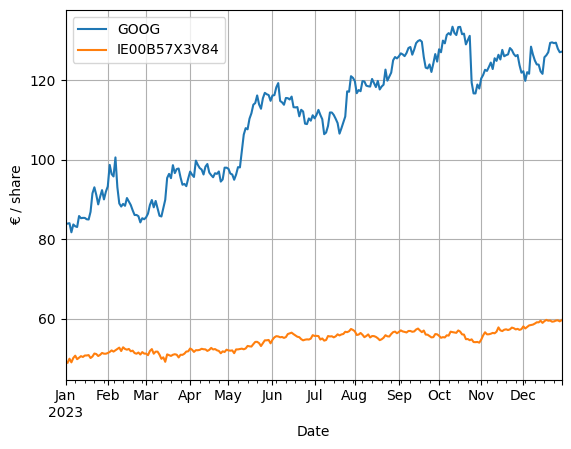

In [7]:
for stock in stockdata.columns:
    stockdata[stock].plot(label=stock)
plt.grid()
plt.ylabel('€ / share')
plt.legend()